<a href="https://colab.research.google.com/github/drusho/data_analysis/blob/main/HackerNews_Top_Post_Trends_ipynbx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Data Analysis, Visualization__
###### _MathPlotLib, Pandas, Seaborn_

<br>

###__Data Source__ 
Hacker News posts from the past 12 months (including # of votes and comments) [link](https://www.kaggle.com/hacker-news/hacker-news-posts)

###__Goals__

* Determine if there is a correlation between number of comments and points on a post?
* Identify top posts by comments and points.
* Identify day/time trends of top posts

<br>

###__Results__

Sunday at noon showed to have best average points for a post. 

There is a strong correlation with total number of points and number of comments.  More comments in a post can heavily enfluence a posts potients to gain more points.

### __Discussion__
Popular post results could be skewed based on creation day and date that data was collected.  Over time posts will normally accrue more points.  The pace that points are gathered over time can vary by post and links directed to post from outside sources (ex. Twitter).  Future data analysis could look into this topic with more detail to determine the time frame it takes for posts to be created and to when they might reach peak growth pace in points.


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [34]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/drusho/data_analysis/main/csv_files/HN_posts_year_to_Sep_26_2016.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 45.1M  100 45.1M    0     0  51.8M      0 --:--:-- --:--:-- --:--:-- 51.7M


In [35]:
# Import Hacker News csv (1st Attempt)


df1 = pd.read_csv('HN_posts_year_to_Sep_26_2016.csv')
df1.head(3)

,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,9/26/2016 3:26
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,9/26/2016 3:24
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,9/26/2016 3:19


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293119 entries, 0 to 293118
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            293119 non-null  int64 
 1   title         293119 non-null  object
 2   url           279256 non-null  object
 3   num_points    293119 non-null  int64 
 4   num_comments  293119 non-null  int64 
 5   author        293119 non-null  object
 6   created_at    293119 non-null  object
dtypes: int64(3), object(4)
memory usage: 15.7+ MB


In [37]:
# Percentage of null values per column

round(df1.isnull().sum()/df1.count()*100,2)

id              0.00
title           0.00
url             4.96
num_points      0.00
num_comments    0.00
author          0.00
created_at      0.00
dtype: float64

### __Clean Columns__

 1.  Remove columns that aren't required for analysis.
  * id
  * url
  * author

 2.  Set date types for _created_at_ column upon import

In [38]:
# Import Hacker News csv (2nd attempt)

cols=['title', 
      'num_points', 
      'num_comments',  
      'created_at']

df2 = pd.read_csv('HN_posts_year_to_Sep_26_2016.csv',
                 usecols=cols,
                 parse_dates=['created_at'])

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293119 entries, 0 to 293118
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   title         293119 non-null  object        
 1   num_points    293119 non-null  int64         
 2   num_comments  293119 non-null  int64         
 3   created_at    293119 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 8.9+ MB


In [39]:
# Description of Points and Comments

round(df2.describe(),2)

,num_points,num_comments
count,293119.00,293119.00
mean,15.03,6.53
std,58.50,30.38
min,1.00,0.00
25%,1.00,0.00
50%,2.00,0.00
75%,4.00,1.00
max,5771.00,2531.00


In [40]:
df2.sample(3)

,title,num_points,num_comments,created_at
177858,The future of Cloud,2,0,2016-02-08 04:55:00
63387,Newspaper publisher arrested after open record...,3,0,2016-07-01 23:02:00
195831,Cooperation Is What Makes Us Human (2013),33,4,2016-01-16 16:27:00


### __Datetime Values__

'created_at' column information available to determine time(s) and date(s).

Created additional datetime type columns in df to aid with analysis

In [41]:
df2['ca_time'] = df2['created_at'].dt.time
df2['ca_hour'] = df2['created_at'].dt.hour
df2['ca_day_no'] = df2['created_at'].dt.weekday
df2['ca_day'] = df2['created_at'].dt.day_name()
df2['ca_month'] = df2['created_at'].dt.month_name()
df2['ca_month_no'] = df2['created_at'].dt.month
df2['ca_year'] = df2['created_at'].dt.year

df2.sample(3)

,title,num_points,num_comments,created_at,ca_time,ca_hour,ca_day_no,ca_day,ca_month,ca_month_no,ca_year
273532,The Darkness Before the Right,2,0,2015-10-02 12:09:00,12:09:00,12,4,Friday,October,10,2015
63058,"Elie Wiesel, Nobel Peace Prize Laureate and Ho...",99,56,2016-07-02 19:58:00,19:58:00,19,5,Saturday,July,7,2016
62078,Life Behind the Stacks: The Secret Apartments ...,3,0,2016-07-04 23:19:00,23:19:00,23,0,Monday,July,7,2016


### __Top 5 Post by Number of Comments__

In [42]:
# Top 5 Commented Posts

top_comments = df2.sort_values(
    ascending=False, 
    by=['num_comments']).head()

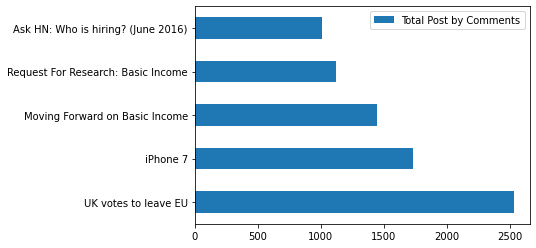

In [43]:
top_comments.plot(
    x='title',
    y='num_comments',
    kind='barh',
    xlabel='').legend(["Total Post by Comments"])

plt.show()

### __Comparing Points and Comments with Days__

### __Correlations From Heatmap__

When comments are compared to points there is a fairly strong positive relationship with a correlation coefficient of 0.81

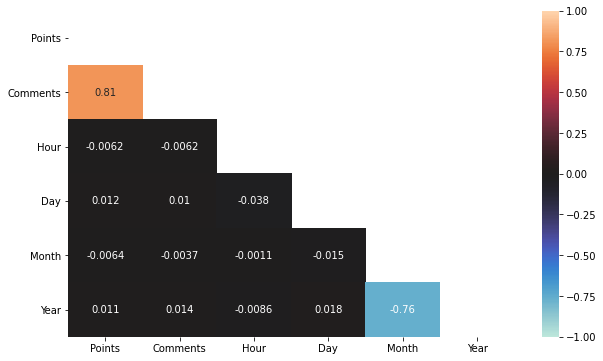

In [160]:
# Renaming column titles to increase readability within chart
df3 = df2.rename(columns={'title':'Title', 'num_points':'Points', 'num_comments':'Comments',
                          'ca_hour':'Hour', 'ca_day_no':'Day', 'ca_month_no':'Month', 'ca_year':'Year'})
def heat_map():
    
    # Size of chart      
    f, ax = plt.subplots(figsize=(10, 6))
    
    # Remove duplicate top half of heatmap using a mask
    mask = np.zeros_like(df3.corr(), 
                     dtype=np.bool)

    mask[np.triu_indices_from(mask)] = True

    ax = sns.heatmap(data=df3.corr(), 
                    annot=True, 
                    vmin = -1, 
                    vmax = 1, 
                    center = 0, 
                    mask=mask)

    # Rotate y-axis headings
    plt.yticks(rotation = 0)

heat_map()

In [163]:
# Compare num_points and num_comments with days
df3 = df2.rename(columns={'title':'Title', 'num_points':'Points', 'num_comments':'Comments',
                          'ca_hour':'Hour', 'ca_day_no':'Day Num', 'ca_day':'Day','ca_month_no':'Month', 'ca_year':'Year'})

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

num_points_groupby_day = df3.groupby(['Day Num','Day'])['Points','Comments'].mean()

num_points_groupby_day.style.apply(highlight_max)

,,Points,Comments
Day Num,Day,,
0,Monday,15.408457,6.611070
1,Tuesday,13.856638,6.090691
2,Wednesday,14.435828,6.266326
3,Thursday,14.525682,6.305361
4,Friday,14.372634,6.376105
5,Saturday,17.331082,7.289494
6,Sunday,17.752834,7.725273


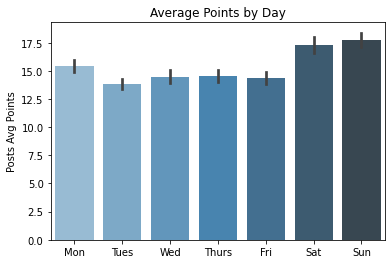

In [177]:
xlabels = ('Mon','Tues','Wed','Thurs','Fri','Sat','Sun')

ax = sns.barplot(
    data=df2, 
    x="ca_day_no", 
    y="num_points",
    palette="Blues_d")

ax.set_xticklabels(xlabels, minor=False)

plt.title('Average Points by Day')
plt.xlabel('')
plt.ylabel('Posts Avg Points')

plt.show()

In [200]:
num_pts_groupby_hr = df3.groupby(
    ['Hour'])['Points','Comments'].mean().sort_values(
        by='Points',
        ascending=False).head().sort_values(
            by='Hour')
print('Top 5 Hours for Posts by Average Points/Comments')


num_pts_groupby_hr.style.apply(highlight_max)

Top 5 Hours for Posts by Average Points/Comments


,Points,Comments
Hour,,
0,15.879906,6.584634
2,16.406170,7.266533
11,16.192910,7.368818
12,16.785927,7.690042
13,16.109430,7.336828


In [140]:
# Top 5 Posts by Points

top_posts = df3.sort_values(
    ascending=False,
    by='Points').head()

top_posts.head()

,Title,Points,Comments,created_at,ca_time,Hour,Day Num,Day,ca_month,Month,Year
170017,A Message to Our Customers,5771,967,2016-02-17 08:38:00,08:38:00,8,2,Wednesday,February,2,2016
69169,UK votes to leave EU,3125,2531,2016-06-24 03:48:00,03:48:00,3,4,Friday,June,6,2016
9263,Pardon Snowden,2553,781,2016-09-14 08:31:00,08:31:00,8,2,Wednesday,September,9,2016
57128,Tell HN: New features and a moderator,2381,451,2016-07-11 19:34:00,19:34:00,19,0,Monday,July,7,2016
136284,Ubuntu on Windows,2049,513,2016-03-30 16:35:00,16:35:00,16,2,Wednesday,March,3,2016


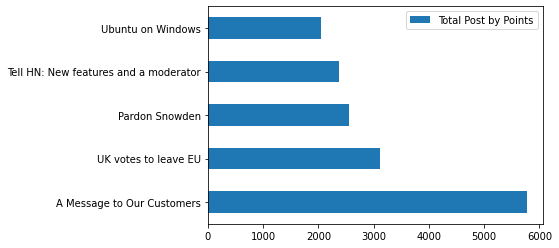

In [178]:
# Top Post by Points 

top_posts.plot(
    y='Points',
    x='Title',
    kind='barh',
    xlabel='',
    ylabel='Points').legend(["Total Post by Points"])

plt.show()

# __Results__

### Correlation of Comments and Points

A strong correlation with total number of points and number of comments. More comments in a post can heavily enfluence a posts potients to gain more points.

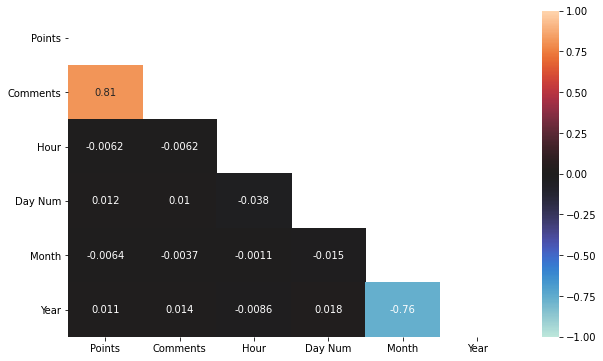

In [181]:
heat_map()

<br>

### Days for Top Posts

Weekends showed to have posts with a higher average for points and comments.

In [189]:
num_points_groupby_day.sort_values(by='Points',ascending=False)

,,Points,Comments
Day Num,Day,,
6,Sunday,17.752834,7.725273
5,Saturday,17.331082,7.289494
0,Monday,15.408457,6.611070
3,Thursday,14.525682,6.305361
2,Wednesday,14.435828,6.266326
4,Friday,14.372634,6.376105
1,Tuesday,13.856638,6.090691


### Hours for Top Post

Posts with the most points showed the highest average for being posted at noon.

In [201]:
num_pts_groupby_hr.style.apply(highlight_max)

,Points,Comments
Hour,,
0,15.879906,6.584634
2,16.406170,7.266533
11,16.192910,7.368818
12,16.785927,7.690042
13,16.109430,7.336828


### Top 5 Posts by Total Points: 

_A Message to Our Customers_

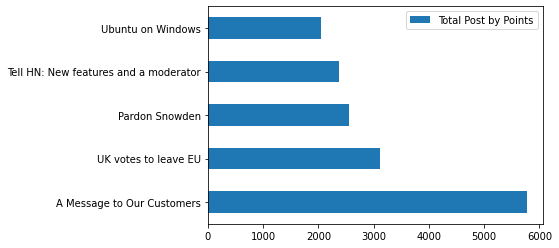

In [190]:
top_post_by_pts ()